In [87]:
import numpy as np
import random

In [2]:
# The statespace
states = ["Sleep","Icecream","Run"]

# Possible sequences of events
transitionName = [["SS","SR","SI"],["RS","RR","RI"],["IS","IR","II"]]

# Probabilities matrix (transition matrix)
transitionMatrix = [[0.2,0.6,0.2],[0.1,0.6,0.3],[0.2,0.7,0.1]]

In [3]:
if sum(transitionMatrix[0])+sum(transitionMatrix[1])+sum(transitionMatrix[1]) != 3:
    print("Somewhere, something went wrong. Transition matrix, perhaps?")
else: print("All is gonna be okay, you should move on!! ;)")

All is gonna be okay, you should move on!! ;)


In [4]:
matrix = np.vstack(transitionMatrix)

In [6]:
matrix

array([[0.2, 0.6, 0.2],
       [0.1, 0.6, 0.3],
       [0.2, 0.7, 0.1]])

In [17]:
#def a function that implements the markov model to forecase the state
#mod

def activity_forecast(days):
    #chose the starting state
    activityToday = 'Sleep'
    #print('start state:' + activityToday)
    # Shall store the sequence of states taken. So, this only has the starting state for now.
    activityList = [activityToday]
    i = 0
    # To calculate the probability of the activityList
    prob = 1
    while i != days:
        if activityToday == "Sleep":
            change = np.random.choice(transitionName[0],
                                  replace=True,
                                 p=transitionMatrix[0])
            if change == 'SS':
                prob = prob*0.2
                activityList.append("Sleep")
                pass
            elif change == "SR":
                prob = prob * 0.6
                activityToday = "Run"
                activityList.append("Run")
            else:
                prob = prob * 0.2
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == 'Run':
            change = np.random.choice(transitionName[1],
                                  replace=True,
                                 p=transitionMatrix[1])
            if change == "RR":
                prob = prob * 0.5
                activityList.append("Run")
                pass
            elif change == "RS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.3
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == 'Icecream':
            change = np.random.choice(transitionName[2],
                                  replace=True,
                                 p=transitionMatrix[2])
            if change == "II":
                prob = prob * 0.1
                activityList.append("Icecream")
                pass
            elif change == "IS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.7
                activityToday = "Run"
                activityList.append("Run")
        #increment until days are met
        i += 1
    #print("Possible states: " + str(activityList))
    #print("End state after "+ str(days) + " days: " + activityToday)
    #print("Probability of the possible sequence of states: " + str(prob))
    return(activityList)

In [18]:
activity_forecast(2)

['Sleep', 'Run', 'Icecream']

You get a random set of transitoins possible along with the proabiility of it happening, starting from state sleep to wtv.
Extend the program further ot aybe iteratie for a couple of hundre times with the same starting state, and you can ss the expected proabilit of enidng at any parotuclay start along with its porbailit

In [35]:
#run n times
#activiy list for d days
#store list activies
list_activity = []
count = 0
n = 10000
d=6
for b in range(1,n):
    list_activity.append(activity_forecast(d))

In [36]:
#print a first few of the acitivties
list_activity[0:13]

[['Sleep', 'Run', 'Run', 'Icecream', 'Run', 'Icecream', 'Sleep'],
 ['Sleep', 'Icecream', 'Run', 'Run', 'Run', 'Run', 'Run'],
 ['Sleep', 'Run', 'Run', 'Icecream', 'Sleep', 'Run', 'Run'],
 ['Sleep', 'Sleep', 'Run', 'Icecream', 'Run', 'Run', 'Icecream'],
 ['Sleep', 'Run', 'Run', 'Run', 'Icecream', 'Run', 'Sleep'],
 ['Sleep', 'Run', 'Run', 'Run', 'Run', 'Run', 'Run'],
 ['Sleep', 'Run', 'Run', 'Icecream', 'Run', 'Run', 'Run'],
 ['Sleep', 'Sleep', 'Run', 'Run', 'Run', 'Run', 'Run'],
 ['Sleep', 'Run', 'Run', 'Run', 'Run', 'Run', 'Icecream'],
 ['Sleep', 'Run', 'Run', 'Run', 'Run', 'Icecream', 'Run'],
 ['Sleep', 'Run', 'Run', 'Sleep', 'Icecream', 'Sleep', 'Icecream'],
 ['Sleep', 'Icecream', 'Run', 'Icecream', 'Run', 'Run', 'Run'],
 ['Sleep', 'Sleep', 'Run', 'Sleep', 'Icecream', 'Run', 'Run']]

In [39]:
#find all objects that made it to run!
count = 0
for b in list_activity:
    if(b[6] == 'Icecream'):
        count += 1

In [40]:
count/n

0.2418

In [25]:
#if we get calculte from sleep to run going through all two states
(0.2*0.6) + (0.6*0.6) + (0.2*0.7)

0.62

In [66]:
a = []
for i in range(0,5):
    a.append(list(np.repeat(1,5)))
matrix = np.vstack(a)

Try it with rock, papers, scisscors, lizards, spock

In [94]:
#get probabilities across rows
def noramlize(matrix):
    weights = np.zeros(matrix.shape)
    for i in range(0,matrix.shape[0]):
        row_sum = np.sum(matrix,axis=1)
        for j in range(0,matrix.shape[1]):
            weights[i,j] = matrix[i,j] / row_sum[i]
    return(weights)

In [82]:
previous_play = 2
next_play = 4
#update
matrix[previous_play,next_play] = matrix[previous_play,next_play] + 1
noramlize(matrix)

array([[0.14285714, 0.14285714, 0.14285714, 0.42857143, 0.14285714],
       [0.08333333, 0.08333333, 0.08333333, 0.66666667, 0.08333333],
       [0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.55555556],
       [0.16666667, 0.16666667, 0.33333333, 0.16666667, 0.16666667],
       [0.16666667, 0.33333333, 0.16666667, 0.16666667, 0.16666667]])

In [142]:
## see how proabilites change
games = 13
selections = [0,1,2,3,4]
probs = [0.1,0.1,0.1,0.1,0]
a = []
for i in range(0,5):
    a.append(list(np.repeat(1,5)))
matrix = np.vstack(a)

previous_play = 2
for i in range(games):
    next_play = np.random.choice(selections,1,probs)
    #update
    matrix[previous_play,next_play] = matrix[previous_play,next_play] + 1
    weights = noramlize(matrix)
    previous_play = next_play
    

In [143]:
weights

array([[0.14285714, 0.14285714, 0.42857143, 0.14285714, 0.14285714],
       [0.25      , 0.125     , 0.125     , 0.125     , 0.375     ],
       [0.22222222, 0.11111111, 0.33333333, 0.22222222, 0.11111111],
       [0.16666667, 0.33333333, 0.16666667, 0.16666667, 0.16666667],
       [0.125     , 0.375     , 0.125     , 0.125     , 0.25      ]])

In [125]:
np.random.choice(selections,1,probs)

array([1])

In [109]:
matrix

array([[198, 187, 208, 200, 200],
       [199, 192, 186, 200, 215],
       [197, 220, 221, 200, 198],
       [183, 203, 216, 192, 197],
       [216, 190, 204, 199, 204]])

https://ipython-books.github.io/131-simulating-a-discrete-time-markov-chain/

In [144]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [175]:
N = 1000  # maximum population size
a = .6 / N  # birth rate
b = .3 / N  # death rate
c = .6 / N # killed by bomb

Simulate a markov chain on the finite space 0,1...N, each state represents a populations size. The x vector will contain the populations size at each time step. We set the initial state to x0 = 25 (that is, there are 25 individuals on the population at init time)

Adding killed by bomb

In [228]:
nsteps = 10000
x = np.zeros(nsteps)
x[0] = 50

nowe we simulate our chain. at each time step, there is a new borth with porbailit $\alpha x_{t}$ and indepdently there is a new death with probabilit $bx_{t}$. these proabilites are proportional to the size of the populations at that time, if the population size reaches 0 or N, the evolution stops

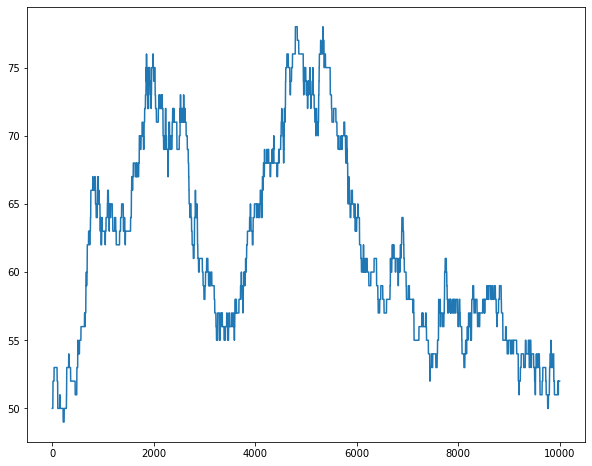

In [234]:
N = 1000 # maximum population size
a = .6 / N  # birth rate
b = .4 / N  # death rate
c = .2 / N # killed by bomb

nsteps = 10000
x = np.zeros(nsteps)
x[0] = 50

for t in range(nsteps-1):
    if 0 < x[t] < N -1:
        #is there a birth?
        birth = np.random.rand() <= a*x[t]
        #is there a death
        death = np.random.rand() <= b*x[t]
        #is there a bombing
        bombing = np.random.rand() <= c*x[t]
        #update the population size
        x[t+1] = x[t] + 1*birth-1*death - 1*bombing
    #the evolution stops if we reach $0$ or $n$
    else:
        x[t+1] = x[t]
        
plt.figure(figsize=(10,8))
plt.plot(x)
plt.show()

We il simulate indedenent trials of this markov chain. We could run the previous simulation with a loop, but it would be very slow (two next for loops). Instead we vectorize the simulaiton by considering al indepdent trials at once. There is a sinlge loop over time. At every time step, we update all trials simultaneiosuly with vectorized operations on vectors. The x vector now contains the population size of all trials, at a particualr time. At init time, the populations sizers are set to a random numbers between 0 and N:

In [246]:
ntrials = 1000
x = np.random.randint(size=ntrials, low=0, high=N)
N = 1000 # maximum population size
a = .6 / N  # birth rate
b = .4 / N  # death rate
c = .2 / N # killed by bomb

We define a function that performs the simulation. At every time step, we find the trials that undergo births and deaths by generating vectors, and we update the population sizes with vector operations:

In [243]:
def simulate(x,nsteps):
    '''
    Run the simulation
    '''
    for a in range(nsteps-1):
        #which trials to updates
        upd = (0<x) & (x<N -1)
        #in which trials do births occur
        birth = 1*(np.random.rand(ntrials) <= a*x)
        #how about deaths
        death = 1*(np.random.rand(ntrials) <= b*x)
        #how about the bombs
        bomb = 1*(np.random.rand(ntrials) <= c*x)
        #update the population size for all trials
        x[upd] += birth[upd] - death[upd] - bomb[upd]

Now lets look at the histograms of the population size at different times. These histograms represet thr probailtit distribution of the markov chains, estimated with independent trials (the Monte carlo Method):

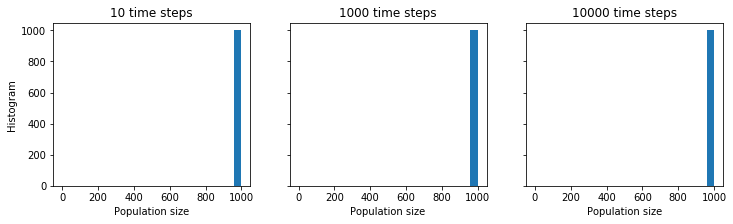

In [244]:
bins = np.linspace(0, N, 25)
nsteps_list = [10, 1000, 10000]
fig, axes = plt.subplots(1, len(nsteps_list),
                         figsize=(12, 3),
                         sharey=True)
for i, nsteps in enumerate(nsteps_list):
    ax = axes[i]
    simulate(x, nsteps)
    ax.hist(x, bins=bins)
    ax.set_xlabel("Population size")
    if i == 0:
        ax.set_ylabel("Histogram")
    ax.set_title(f"{nsteps} time steps")

Whereas, initally, the population sizes look unfiomrly distributed between 0 and X, they appear to converge to 0 or N after a suffienclty long time. This is because the states 0 and N are absorbing, one reached, tehcain cannot leave these states. Futhermore, these states can be reached from any other state

# How it works..

Mathematically, a discrete time Markov chain on a space $E$ is a sequence of random variables $X_{1},X_{2}...$ that satisfy the markov property:

\begin{align}
\forall n \geq 1, P(X_{n+1} | X_{1},X_{2},X_{3}...X_{n}) = P(X_{n+1} | X_{n}). 
\end{align}

These values form a matrix called the transition matrix. This matrix is the adjanceny matrix of a directed graph called the stats diagram. Every node is a state, and the node $i$ is connectted to the node $j$ if the cain has a non-zero proability of transiton between hese nodes.

# Theres more...



Simulating a single markov cain in python is not particularly efficient becase we need a for loop. However, simulating many indepedent chains following the same proceess can be made efficient with vecotrization and paralleilzation (all tasks are indepndent, this the problem is embarassingly parrallel). This is useful when we are intersted in statistical properties of the chain (example of the monte carlo method).


In [249]:
(0<x)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,